<a href="https://colab.research.google.com/github/raghuvarm17633/Spam-Email-Classification-using-NLP-and-Machine-Learning/blob/main/Spam%20Email%20Classification%20using%20NLP%20and%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Email spam Detection**

Email spam detection system is used to detect email spam using Machine Learning technique called Natural Language Processing and Python, where we have a dataset contain a lot of emails by extract important words and then use naive classifier we can detect if this email is spam or not.



**Libraries**

In [20]:
!pip install nltk

In [37]:
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Project Pipeline**

For any machine learning project it consist of three main phases as following :-

**Scoping** : List the problem description and project goals
**The Data** : Load, analyse and prepare the dataset for training
**The Model** : Create and train the model on the dataset

**1 | Scoping**

The project problem is that we have a dataset containing a set of emails and we will use machine learning and nlp techniques in order to determine if this email is spam or not.

**2 | The Data**

In this phase we will analyze and prepare the dataset before training by applying varoius steps as following :-

1.Data Loading

2.Data Visualization

3.Data Cleaning

4.Data Splitting

**1. Data Loading**

Load the dataset and show its info and statistics

In [5]:
# Load the dataset
dataset = pd.read_csv('emails.csv')
dataset.shape

(5728, 2)

In [6]:
# Show dataset head (first 5 records)
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['spam']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'spam'}, axis=1)
              .sort_values('spam', ascending=True))
  xs = counted['spam']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('spam', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('spam')
_ = plt.ylabel('count()')

In [7]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [11]:
# Show dataset statistics
dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


from matplotlib import pyplot as plt
_df_0['spam'].plot(kind='hist', bins=20, title='spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['spam'].plot(kind='line', figsize=(8, 4), title='spam')
plt.gca().spines[['top', 'right']].set_visible(False)

**2. Data Visualization**

Visualize dataset features frequencies to get some insights



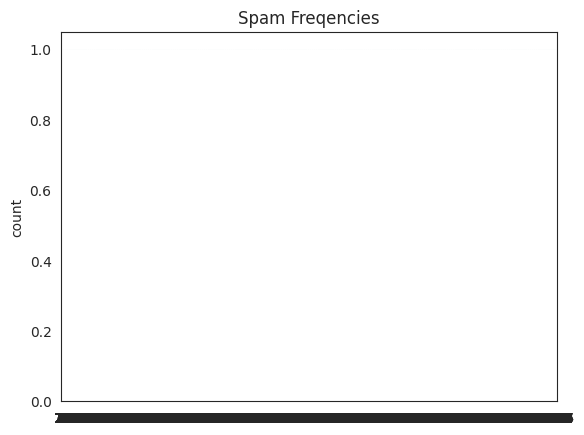

In [41]:
# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(dataset['spam'])
plt.title("Spam Freqencies")
plt.show()

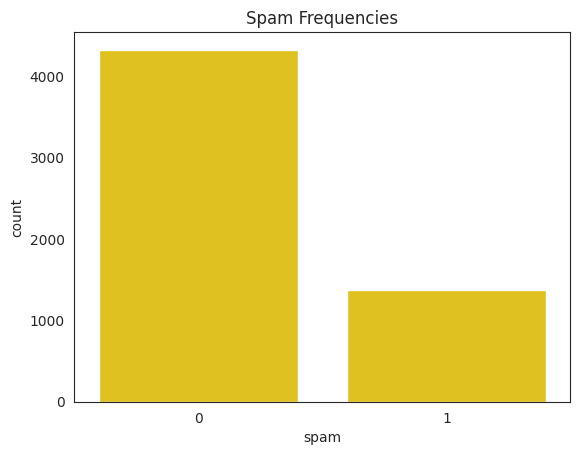

In [24]:
import seaborn as sns

# Assuming your data is loaded into a DataFrame named 'dataset'
sns.countplot(x="spam", data=dataset, color="gold")  # Use the named color "gold"
plt.title("Spam Frequencies")
plt.show()

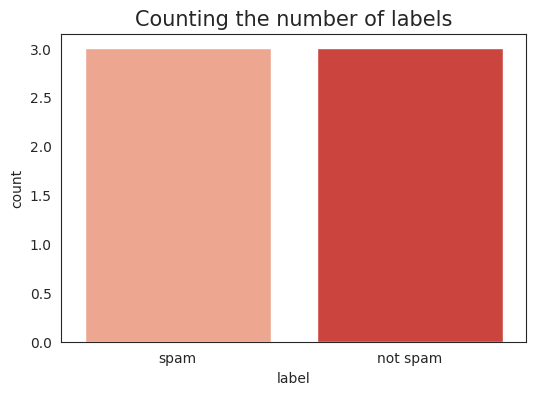

label
spam        3
not spam    3
Name: count, dtype: int64


In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create some sample data
data = {'label': ['spam', 'not spam', 'spam', 'not spam', 'not spam', 'spam']}
df = pd.DataFrame(data)

# Create a countplot of the labels
plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=df, palette="Reds")

# Set the title and rotate x-axis labels for readability
plt.title("Counting the number of labels", fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

# Print the value counts of the labels
print(df['label'].value_counts())

**3. Data Cleaning**

Handling missing values and check for duplicate

In [12]:
# Check for missing data for each column
dataset.isnull().sum()

,0
text,0
spam,0


In [17]:
# Check for duplicates and remove them
dataset.drop_duplicates(inplace=True)

In [18]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [19]:
# Fit the CountVectorizer to data
message = CountVectorizer(analyzer=process).fit_transform(dataset['text'])

In [28]:
import os
from joblib import dump

# Assuming 'message' is your vectorizer object
file_path = "models/vectorizer.pkl"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the vectorizer
dump(message, open(file_path, "wb"))

**4. Data Splitting**

Split the dataset into training and testing sets

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

**3. The Model**

In this phase we will create and train a multinomial naive bayes model



In [30]:
# Model creation
model = MultinomialNB()

In [31]:
# Model training
model.fit(X_train, y_train)

MultinomialNB()

In [32]:
# Model saving
dump(model, open("models/model.pkl", 'wb'))

In [33]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [34]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.20983318700614

In [35]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       870\n           1       0.97      1.00      0.98       269\n\n    accuracy                           0.99      1139\n   macro avg       0.98      0.99      0.99      1139\nweighted avg       0.99      0.99      0.99      1139\n'

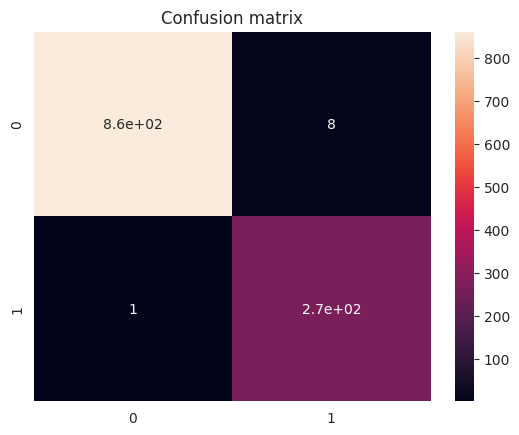

In [36]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()